In [21]:
#emotions behind the screen : Analyzing Sentiments in student reviews of online course

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
data = pd.read_csv('/content/drive/MyDrive/reviews.csv')
data.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [24]:
pd.unique(data['Label'])

array([5, 4, 3, 2, 1])

<Axes: xlabel='Label', ylabel='count'>

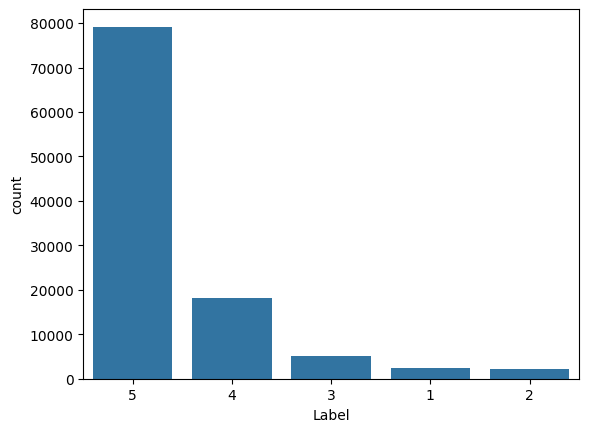

In [25]:
sns.countplot(data=data,
              x='Label',
              order=data.Label.value_counts().index)

In [26]:
pos_neg = []
for i in range(len(data['Label'])):
    if data['Label'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg

In [27]:
from tqdm import tqdm


def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)

        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower()
                                          for token in nltk.word_tokenize(sentence)
                                          if token.lower() not in stopwords.words('english')))

    return preprocessed_text

In [28]:
#import re
#import nltk
#import pandas as pd
#from tqdm import tqdm
#from nltk.corpus import stopwords



import nltk
nltk.download('punkt')

# Preprocess reviews
preprocessed_review = preprocess_text(data['Review'].values)
data['Review'] = preprocessed_review



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 107018/107018 [06:09<00:00, 289.81it/s]


In [29]:
data.head()

,Id,Review,Label,label
0,0,good interesting,5,1
1,1,class helpful currently im still learning clas...,5,1
2,2,likeprof tas helpful discussion among students...,5,1
3,3,easy follow includes lot basic important techn...,5,1
4,4,really nice teacheri could got point eazliy v,4,0


In [30]:
data["label"].value_counts()

label
1    79173
0    27845
Name: count, dtype: int64

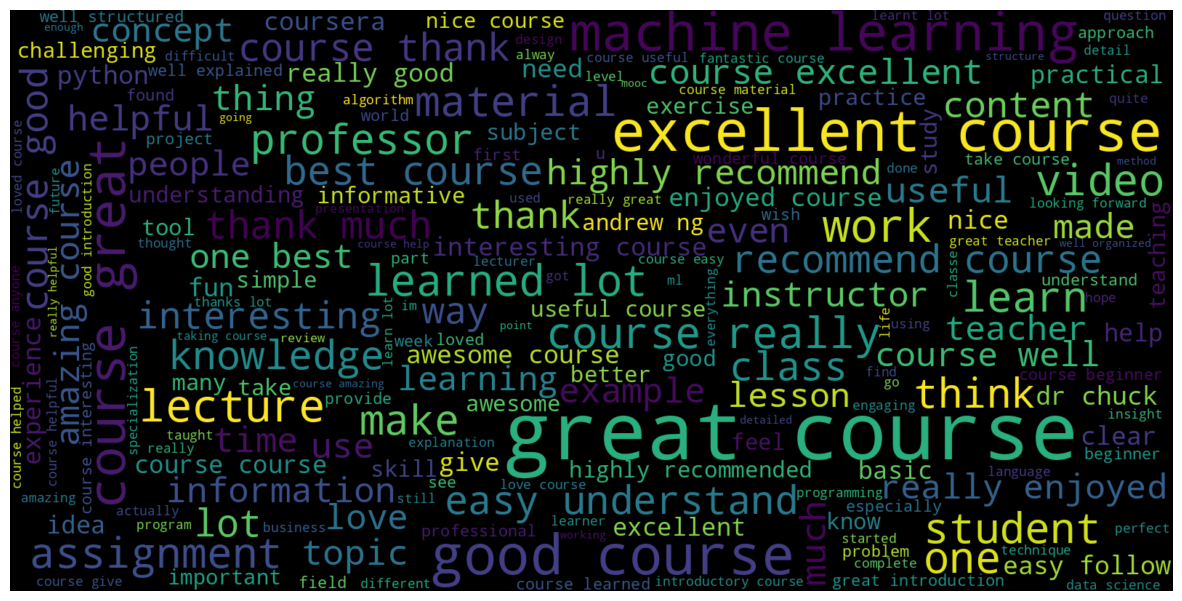

In [31]:
consolidated = ' '.join(
    word for word in data['Review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.9838637694903908


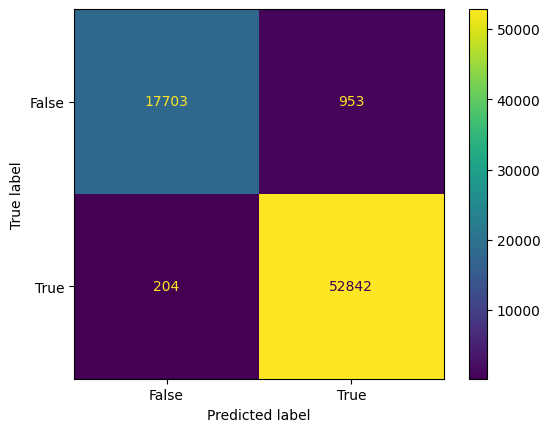

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_train,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()